In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Exploratory data analysis

## Data cleaning

In [2]:
data=pd.read_csv("20230507_train.txt", sep=";")

In [3]:
df=data

In [4]:
data.head()

,id,cnae3,dcnae_agr3,provincia,anio,gradvinc,noprotra,noprovin,volneg,fact,num_bancos,pmc,target
0,616016,432,INSTALACIONES ELECTRICAS. DE FONTANERIA Y OTRA...,28,2016.0,1,4,4,86062.25,NaN,NaN,NaN,1
1,243724,411,PROMOCION INMOBILIARIA,28,1992.0,5,0,0,0.00,NaN,NaN,NaN,0
2,637325,960,OTROS SERVICIOS PERSONALES,33,2018.0,5,0,0,0.00,NaN,NaN,NaN,0
3,385667,432,INSTALACIONES ELECTRICAS. DE FONTANERIA Y OTRA...,35,2004.0,1,4,4,174966.92,NaN,NaN,NaN,0
4,605174,466,COMERCIO AL POR MAYOR DE OTRA MAQUINARIA. EQUI...,50,2013.0,5,0,0,0.00,NaN,NaN,75.73,0


In [5]:
data.shape

(24921, 13)

In [6]:
data.dtypes

id              int64
cnae3           int64
dcnae_agr3     object
provincia      object
anio          float64
gradvinc        int64
noprotra        int64
noprovin        int64
volneg        float64
fact          float64
num_bancos    float64
pmc           float64
target          int64
dtype: object

In [7]:
data.isnull().sum()

id                0
cnae3             0
dcnae_agr3        7
provincia       203
anio            108
gradvinc          0
noprotra          0
noprovin          0
volneg            0
fact          21307
num_bancos    21307
pmc           15826
target            0
dtype: int64

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,24921.0,453976.784760,261479.134310,29.00,227368.0000,454349.00,688863.000,880947.00
cnae3,24921.0,513.057141,216.376012,9.00,431.0000,475.00,682.000,990.00
anio,24813.0,2002.456374,11.482027,1896.00,1996.0000,2003.00,2011.000,2024.00
gradvinc,24921.0,3.515228,1.614522,1.00,2.0000,4.00,5.000,5.00
noprotra,24921.0,1.349986,1.623209,0.00,0.0000,1.00,3.000,8.00
noprovin,24921.0,0.802054,1.497464,0.00,0.0000,0.00,1.000,13.00
volneg,24921.0,88051.501783,648299.835180,-126681.02,0.0000,239.26,31123.890,52049166.78
fact,3614.0,26055.552701,92882.986332,0.00,1709.8325,6789.14,21589.235,2599504.64
num_bancos,3614.0,1.919480,1.632561,1.00,1.0000,1.00,2.000,13.00
pmc,9095.0,5489.076633,463009.834036,0.00,14.8950,52.84,109.655,44129495.92


<function matplotlib.pyplot.show(close=None, block=None)>

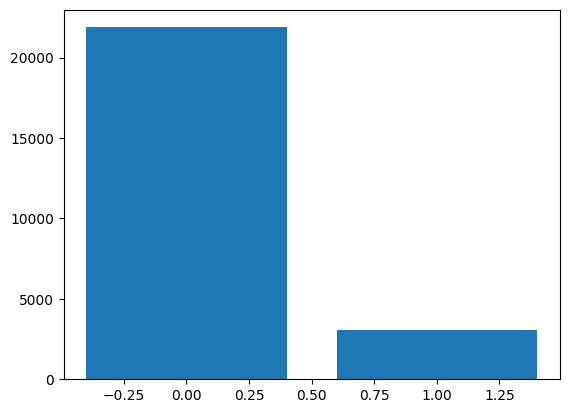

In [9]:
value_counts=data['target'].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.show

In [10]:
value_counts

0    21883
1     3038
Name: target, dtype: int64

### Handling missing values

#### dcnae_agr3:

we can clearly detect that our dataset is unbalanced as we would suspect that more companies will not sign up for a pos with the bank 

In [11]:
data[data['dcnae_agr3'].isna()]

,id,cnae3,dcnae_agr3,provincia,anio,gradvinc,noprotra,noprovin,volneg,fact,num_bancos,pmc,target
2399,762375,9,NaN,NaN,1967.0,4,0,1,383876.42,NaN,NaN,NaN,0
5648,764526,9,NaN,11,1970.0,4,0,0,9527.71,NaN,NaN,NaN,0
8822,108377,9,NaN,28,1973.0,5,0,0,696.94,NaN,NaN,NaN,0
10510,110340,9,NaN,28,1961.0,4,1,0,927.07,NaN,NaN,NaN,0
11409,776545,9,NaN,17,1985.0,5,0,0,75.88,NaN,NaN,NaN,0
13382,859162,9,NaN,28,NaN,4,0,1,14602.15,NaN,NaN,NaN,0
13822,765371,9,NaN,28,1955.0,5,0,0,2.94,NaN,NaN,NaN,0


In [12]:
data[data['cnae3']==9]

,id,cnae3,dcnae_agr3,provincia,anio,gradvinc,noprotra,noprovin,volneg,fact,num_bancos,pmc,target
2399,762375,9,NaN,NaN,1967.0,4,0,1,383876.42,NaN,NaN,NaN,0
5648,764526,9,NaN,11,1970.0,4,0,0,9527.71,NaN,NaN,NaN,0
8822,108377,9,NaN,28,1973.0,5,0,0,696.94,NaN,NaN,NaN,0
10510,110340,9,NaN,28,1961.0,4,1,0,927.07,NaN,NaN,NaN,0
11409,776545,9,NaN,17,1985.0,5,0,0,75.88,NaN,NaN,NaN,0
13382,859162,9,NaN,28,NaN,4,0,1,14602.15,NaN,NaN,NaN,0
13822,765371,9,NaN,28,1955.0,5,0,0,2.94,NaN,NaN,NaN,0


In [13]:
data['cnae3'].nunique()

255

In [14]:
data['dcnae_agr3'].nunique()

254

makes sense cause for cnae3=9 there is a missing value for dcnae_agr3 as well 

since these rows are only 7, have also a missing value for at least 3 other rows and the target variable is 0 (the bigger category) im just gonna drop them 

In [15]:
data= data.dropna(subset=['dcnae_agr3'])

In [16]:
data[data['anio'].isna()]

,id,cnae3,dcnae_agr3,provincia,anio,gradvinc,noprotra,noprovin,volneg,fact,num_bancos,pmc,target
124,89317,854,EDUCACION POSTSECUNDARIA,33,NaN,2,3,0,21129.16,NaN,NaN,NaN,0
593,76031,683,ACTIVIDADES INMOBILIARIAS POR CUENTA DE TERCEROS,24,NaN,5,0,0,0.00,NaN,NaN,NaN,0
1083,69935,12,CULTIVOS PERENNES,28,NaN,2,4,0,1291.07,NaN,NaN,NaN,1
1136,571825,749,OTRAS ACTIVIDADES PROFESIONALES. CIENTIFICAS Y...,20,NaN,4,0,3,40094.16,NaN,NaN,46.41,0
1195,88568,451,VENTA DE VEHICULOS DE MOTOR,29,NaN,5,0,0,0.00,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23739,581722,471,COMERCIO AL POR MENOR EN ESTABLECIMIENTOS NO E...,19,NaN,5,0,0,0.00,NaN,NaN,NaN,0
23781,580613,949,OTRAS ACTIVIDADES ASOCIATIVAS,28,NaN,2,3,0,87365.96,NaN,NaN,NaN,0
23869,480511,411,PROMOCION INMOBILIARIA,17,NaN,5,0,0,0.00,NaN,NaN,NaN,0
24298,582037,11,CULTIVOS NO PERENNES,14,NaN,2,2,0,14030.29,NaN,NaN,NaN,0


#### anio:

In [17]:
data['anio'].value_counts()

2003.0    975
2005.0    904
2004.0    891
2002.0    886
2001.0    882
         ... 
1942.0      1
1899.0      1
1921.0      1
1903.0      1
1923.0      1
Name: anio, Length: 104, dtype: int64

In [18]:
data['anio'].unique()

array([2016., 1992., 2018., 2004., 2013., 2011., 2000., 2014., 2010.,
       1984., 2003., 1990., 1993., 1994., 2001., 1995., 1998., 1997.,
       1991., 2008., 2021., 1963., 2020., 1988., 1982., 1996., 2006.,
       2005., 2017., 1986., 1987., 2019., 1965., 1999., 2015., 1971.,
       1989., 2022., 1981., 1950., 2002., 2007., 1955., 1958., 2009.,
       1970.,   nan, 1985., 1980., 2012., 1978., 1983., 2023., 1974.,
       1979., 1976., 1968., 1975., 1977., 1973., 1952., 1940., 1959.,
       1966., 1969., 1944., 1960., 1961., 1972., 1967., 2024., 1939.,
       1964., 1956., 1953., 1936., 1951., 1957., 1962., 1954., 1937.,
       1903., 1948., 1921., 1899., 1949., 1947., 1901., 1942., 1946.,
       1902., 1924., 1904., 1938., 1922., 1896., 1898., 1912., 1917.,
       1945., 1943., 1928., 1916., 1920., 1923.])

i want to check if it makes sense to impute the missing values with the most frequent one 2003 and for that i neeed to first check if there is any trend between year and target

In [19]:
data_anio=data.sort_values('anio', ascending=True)

In [20]:
count_totals = data_anio.groupby('anio')['target'].value_counts().unstack().fillna(0)

In [21]:
count_totals

target,0,1
anio,,
1896.0,2.0,0.0
1898.0,1.0,0.0
1899.0,1.0,0.0
1901.0,2.0,0.0
1902.0,1.0,0.0
...,...,...
2020.0,173.0,85.0
2021.0,160.0,80.0
2022.0,105.0,49.0


In [22]:
frequency_ones = count_totals[1] / (count_totals[0] + count_totals[1])

In [23]:
frequency_ones

anio
1896.0    0.000000
1898.0    0.000000
1899.0    0.000000
1901.0    0.000000
1902.0    0.000000
            ...   
2020.0    0.329457
2021.0    0.333333
2022.0    0.318182
2023.0    0.402439
2024.0    0.405405
Length: 104, dtype: float64

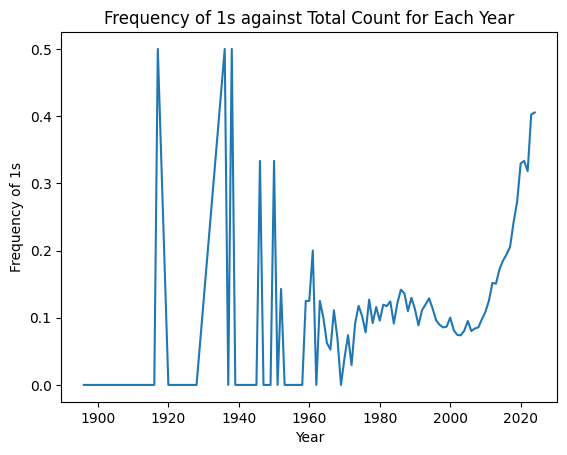

In [24]:
plt.plot(frequency_ones.index, frequency_ones.values)
plt.xlabel('Year')
plt.ylabel('Frequency of 1s')
plt.title('Frequency of 1s against Total Count for Each Year')
plt.show()

since there is no trend i believe it makes sense to replace the missing values in the year column with 2003

In [25]:
data['anio'] = data['anio'].fillna(2003)

C:\Users\yara-\AppData\Local\Temp\ipykernel_13564\4110873545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['anio'] = data['anio'].fillna(2003)


#### provencia:

In [26]:
data[data['provincia'].isna()]

,id,cnae3,dcnae_agr3,provincia,anio,gradvinc,noprotra,noprovin,volneg,fact,num_bancos,pmc,target
113,256288,494,TRANSPORTE DE MERCANCIAS POR CARRETERA Y SERVI...,NaN,1996.0,5,0,0,0.00,NaN,NaN,NaN,0
141,533267,494,TRANSPORTE DE MERCANCIAS POR CARRETERA Y SERVI...,NaN,2006.0,5,0,0,0.00,NaN,NaN,NaN,0
232,857413,494,TRANSPORTE DE MERCANCIAS POR CARRETERA Y SERVI...,NaN,2010.0,5,0,0,0.00,NaN,NaN,NaN,0
322,414463,620,PROGRAMACION. CONSULTORIA Y OTRAS ACTIVIDADES ...,NaN,2001.0,5,0,0,0.00,NaN,NaN,NaN,0
397,475422,462,COMERCIO AL POR MAYOR DE MATERIAS PRIMAS AGRAR...,NaN,2004.0,4,0,0,2894.35,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24423,434903,15,PRODUCCION AGRICOLA COMBINADA CON PRODUCCION G...,NaN,1994.0,5,0,0,0.00,NaN,NaN,NaN,0
24458,132371,467,OTRO COMERCIO AL POR MAYOR ESPECIALIZADO,NaN,1989.0,4,2,4,332786.67,NaN,NaN,NaN,0
24774,764013,683,ACTIVIDADES INMOBILIARIAS POR CUENTA DE TERCEROS,NaN,2009.0,1,2,1,183176.47,NaN,NaN,NaN,0
24867,394706,411,PROMOCION INMOBILIARIA,NaN,2001.0,5,0,0,0.00,NaN,NaN,NaN,0


In [27]:
data['provincia'].value_counts()

28    4903
08    2863
46    1344
41    1146
03    1003
29     971
15     710
35     619
07     603
36     591
30     585
38     526
48     486
50     484
11     439
17     415
14     412
33     381
45     380
18     366
39     339
47     321
04     298
43     292
12     291
06     270
24     259
20     258
31     256
25     255
21     223
13     216
02     207
23     205
27     181
37     166
32     166
10     164
26     156
01     128
22     126
09     115
19      86
16      80
34      72
05      70
40      67
44      62
49      53
42      43
52      38
51      15
**       4
00       3
Name: provincia, dtype: int64

same as year, will check if there is a trend between provincia and target, if not will impute the missing values with the most frequent one which is 28

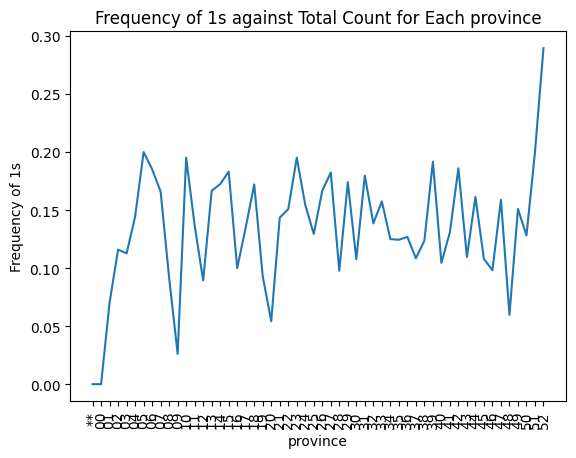

In [28]:
data_provincia=data.sort_values('provincia', ascending=True)
count_total = data_provincia.groupby('provincia')['target'].value_counts().unstack().fillna(0)
frequency_one = count_total[1] / (count_total[0] + count_total[1])
plt.plot(frequency_one.index, frequency_one.values)
plt.xlabel('province')
plt.ylabel('Frequency of 1s')
plt.title('Frequency of 1s against Total Count for Each province')
plt.xticks(rotation='vertical')
plt.show()

no clear trend so we impute with 28

In [29]:
data['provincia'] = data['provincia'].fillna(28)

C:\Users\yara-\AppData\Local\Temp\ipykernel_13564\760594601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['provincia'] = data['provincia'].fillna(28)


provincia also has 4 rows with the value "**", since theyre only 4 i will drop these rows:

In [30]:
data = data[data["provincia"] != "**"]

In [31]:
data['provincia'].value_counts()

28    4903
08    2863
46    1344
41    1146
03    1003
29     971
15     710
35     619
07     603
36     591
30     585
38     526
48     486
50     484
11     439
17     415
14     412
33     381
45     380
18     366
39     339
47     321
04     298
43     292
12     291
06     270
24     259
20     258
31     256
25     255
21     223
13     216
02     207
23     205
28     202
27     181
32     166
37     166
10     164
26     156
01     128
22     126
09     115
19      86
16      80
34      72
05      70
40      67
44      62
49      53
42      43
52      38
51      15
00       3
Name: provincia, dtype: int64

In [32]:
data.dtypes

id              int64
cnae3           int64
dcnae_agr3     object
provincia      object
anio          float64
gradvinc        int64
noprotra        int64
noprovin        int64
volneg        float64
fact          float64
num_bancos    float64
pmc           float64
target          int64
dtype: object

In [33]:
data["provincia"] = data["provincia"].astype(int)

#### fact and num_bancos:

fact and num_bancos have the same number of missing values and i believe for the same rows so lets deal with them together

In [34]:
data.isnull().sum()

id                0
cnae3             0
dcnae_agr3        0
provincia         0
anio              0
gradvinc          0
noprotra          0
noprovin          0
volneg            0
fact          21296
num_bancos    21296
pmc           15815
target            0
dtype: int64

In [35]:
data['num_bancos'].value_counts()

1.0     2224
2.0      691
3.0      251
6.0      122
4.0      105
5.0       92
7.0       83
8.0       35
9.0        9
13.0       1
11.0       1
Name: num_bancos, dtype: int64

In [36]:
data['fact'].value_counts()

0.03        2
1693.72     2
661.89      2
78.17       2
59.83       2
           ..
22415.25    1
4216.26     1
1709.82     1
31292.23    1
70014.17    1
Name: fact, Length: 3607, dtype: int64

In [37]:
data['num_bancos'].unique()

array([nan,  1.,  7.,  3.,  2.,  4.,  6.,  5.,  9.,  8., 13., 11.])

In [38]:
data['fact'].unique()

array([     nan,  5794.92, 31764.05, ..., 36679.43, 18783.81, 70014.17])

it would make sense to create a column that says that there is a missing value at this row for each of the two columns as it can be informative for our model since they have a big number of missing values

i would also check if the rows with missing values for both of the columns are actually the same

In [39]:
data['NA_fact']=0
data.loc[data['fact'].isnull(), 'NA_fact'] = 1

In [40]:
data['NA_num_bancos']=0
data.loc[data['num_bancos'].isnull(), 'NA_num_bancos'] = 1

In [41]:
(data['NA_fact']==data['NA_num_bancos']).all()

True

since the two columns have a missing value on the same row, I will create one column instead of two for the two variables

In [42]:
data['NA_fact_numbancos']=data['NA_fact']

In [43]:
data=data.drop(['NA_fact','NA_num_bancos'],axis=1)

In [44]:
data

,id,cnae3,dcnae_agr3,provincia,anio,gradvinc,noprotra,noprovin,volneg,fact,num_bancos,pmc,target,NA_fact_numbancos
0,616016,432,INSTALACIONES ELECTRICAS. DE FONTANERIA Y OTRA...,28,2016.0,1,4,4,86062.25,NaN,NaN,NaN,1,1
1,243724,411,PROMOCION INMOBILIARIA,28,1992.0,5,0,0,0.00,NaN,NaN,NaN,0,1
2,637325,960,OTROS SERVICIOS PERSONALES,33,2018.0,5,0,0,0.00,NaN,NaN,NaN,0,1
3,385667,432,INSTALACIONES ELECTRICAS. DE FONTANERIA Y OTRA...,35,2004.0,1,4,4,174966.92,NaN,NaN,NaN,0,1
4,605174,466,COMERCIO AL POR MAYOR DE OTRA MAQUINARIA. EQUI...,50,2013.0,5,0,0,0.00,NaN,NaN,75.73,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24916,742492,411,PROMOCION INMOBILIARIA,4,2013.0,4,1,2,97529.72,NaN,NaN,NaN,0,1
24917,617487,931,ACTIVIDADES DEPORTIVAS,37,2017.0,1,3,4,656367.19,36679.43,7.0,7.92,0,0
24918,486289,475,COMERCIO AL POR MENOR DE OTROS ARTICULOS DE US...,1,1991.0,5,0,0,0.00,NaN,NaN,70.26,0,1
24919,405081,561,RESTAURANTES Y PUESTOS DE COMIDAS,30,2008.0,4,1,0,0.00,18783.81,1.0,NaN,0,0


i will replace the missing values in num_bancos with the mean because the distribution of the data is symmetrical and fact with the median because its not 

In [45]:
median_value = data['fact'].median()

data['fact'].fillna(median_value, inplace=True)

print("Median:", median_value)

Median: 6789.139999999999


In [46]:
mean_value = data['num_bancos'].mean()

data['num_bancos'].fillna(mean_value, inplace=True)

print("Mean:", mean_value)

Mean: 1.9194798007747649


In [47]:
data.isnull().sum()

id                       0
cnae3                    0
dcnae_agr3               0
provincia                0
anio                     0
gradvinc                 0
noprotra                 0
noprovin                 0
volneg                   0
fact                     0
num_bancos               0
pmc                  15815
target                   0
NA_fact_numbancos        0
dtype: int64

#### pmc:

In [48]:
data['pmc'].value_counts()

0.00        477
0.02         10
0.06          9
0.03          9
0.04          8
           ... 
10235.85      1
33.65         1
14.33         1
174.32        1
12.95         1
Name: pmc, Length: 6710, dtype: int64

the first step is to create a column to say if there was a missing value on this row for pmc because theyre many for this variable

In [49]:
data['NA_pmc'] = data['pmc'].isna().astype(int)

In [50]:
data

,id,cnae3,dcnae_agr3,provincia,anio,gradvinc,noprotra,noprovin,volneg,fact,num_bancos,pmc,target,NA_fact_numbancos,NA_pmc
0,616016,432,INSTALACIONES ELECTRICAS. DE FONTANERIA Y OTRA...,28,2016.0,1,4,4,86062.25,6789.14,1.91948,NaN,1,1,1
1,243724,411,PROMOCION INMOBILIARIA,28,1992.0,5,0,0,0.00,6789.14,1.91948,NaN,0,1,1
2,637325,960,OTROS SERVICIOS PERSONALES,33,2018.0,5,0,0,0.00,6789.14,1.91948,NaN,0,1,1
3,385667,432,INSTALACIONES ELECTRICAS. DE FONTANERIA Y OTRA...,35,2004.0,1,4,4,174966.92,6789.14,1.91948,NaN,0,1,1
4,605174,466,COMERCIO AL POR MAYOR DE OTRA MAQUINARIA. EQUI...,50,2013.0,5,0,0,0.00,6789.14,1.91948,75.73,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24916,742492,411,PROMOCION INMOBILIARIA,4,2013.0,4,1,2,97529.72,6789.14,1.91948,NaN,0,1,1
24917,617487,931,ACTIVIDADES DEPORTIVAS,37,2017.0,1,3,4,656367.19,36679.43,7.00000,7.92,0,0,0
24918,486289,475,COMERCIO AL POR MENOR DE OTROS ARTICULOS DE US...,1,1991.0,5,0,0,0.00,6789.14,1.91948,70.26,0,1,0
24919,405081,561,RESTAURANTES Y PUESTOS DE COMIDAS,30,2008.0,4,1,0,0.00,18783.81,1.00000,NaN,0,0,1


In [51]:
data.columns.tolist()

['id',
 'cnae3',
 'dcnae_agr3',
 'provincia',
 'anio',
 'gradvinc',
 'noprotra',
 'noprovin',
 'volneg',
 'fact',
 'num_bancos',
 'pmc',
 'target',
 'NA_fact_numbancos',
 'NA_pmc']

lets use a regression  model to impute the missing values in the column pmc

In [52]:
data.dtypes

id                     int64
cnae3                  int64
dcnae_agr3            object
provincia              int32
anio                 float64
gradvinc               int64
noprotra               int64
noprovin               int64
volneg               float64
fact                 float64
num_bancos           float64
pmc                  float64
target                 int64
NA_fact_numbancos      int64
NA_pmc                 int32
dtype: object

In [108]:
features = ['id', 'cnae3', 'dcnae_agr3', 'provincia', 'anio', 'gradvinc', 'noprotra', 'noprovin', 'volneg', 'fact', 'num_bancos']
target = ['pmc']

numeric_columns = data.select_dtypes(include='number').columns.tolist()

numeric_features = [feat for feat in features if feat in numeric_columns] + target

imputer = IterativeImputer()

imputed_values = imputer.fit_transform(data[numeric_features])

data[numeric_features] = imputed_values

data

,id,cnae3,dcnae_agr3,provincia,anio,gradvinc,noprotra,noprovin,volneg,fact,num_bancos,pmc,target,NA_fact_numbancos,NA_pmc,anio_bins
0,616016.0,432.0,0.066142,28.0,2016.0,1.0,4.0,4.0,86062.25,6789.14,1.91948,5442.152607,1.0,1,1,4
1,243724.0,411.0,0.008322,28.0,1992.0,5.0,0.0,0.0,0.00,6789.14,1.91948,5627.821297,0.0,1,1,0
2,637325.0,960.0,0.123340,33.0,2018.0,5.0,0.0,0.0,0.00,6789.14,1.91948,5461.491038,0.0,1,1,4
3,385667.0,432.0,0.066142,35.0,2004.0,1.0,4.0,4.0,174966.92,6789.14,1.91948,5510.215238,0.0,1,1,2
4,605174.0,466.0,0.139286,50.0,2013.0,5.0,0.0,0.0,0.00,6789.14,1.91948,75.730000,0.0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24916,742492.0,411.0,0.008322,4.0,2013.0,4.0,1.0,2.0,97529.72,6789.14,1.91948,5384.929016,0.0,1,1,4
24917,617487.0,931.0,0.246377,37.0,2017.0,1.0,3.0,4.0,656367.19,36679.43,7.00000,7.920000,0.0,0,0,4
24918,486289.0,475.0,0.201987,1.0,1991.0,5.0,0.0,0.0,0.00,6789.14,1.91948,70.260000,0.0,1,0,0
24919,405081.0,561.0,0.312336,30.0,2008.0,4.0,1.0,0.0,0.00,18783.81,1.00000,5559.420615,0.0,0,1,3


In [54]:
data.isnull().sum()

id                   0
cnae3                0
dcnae_agr3           0
provincia            0
anio                 0
gradvinc             0
noprotra             0
noprovin             0
volneg               0
fact                 0
num_bancos           0
pmc                  0
target               0
NA_fact_numbancos    0
NA_pmc               0
dtype: int64

## Univariate analysis

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24910 entries, 0 to 24920
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 24910 non-null  float64
 1   cnae3              24910 non-null  float64
 2   dcnae_agr3         24910 non-null  object 
 3   provincia          24910 non-null  float64
 4   anio               24910 non-null  float64
 5   gradvinc           24910 non-null  float64
 6   noprotra           24910 non-null  float64
 7   noprovin           24910 non-null  float64
 8   volneg             24910 non-null  float64
 9   fact               24910 non-null  float64
 10  num_bancos         24910 non-null  float64
 11  pmc                24910 non-null  float64
 12  target             24910 non-null  float64
 13  NA_fact_numbancos  24910 non-null  int64  
 14  NA_pmc             24910 non-null  int32  
dtypes: float64(12), int32(1), int64(1), object(1)
memory usage: 2.9+ MB


In [56]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,24910.0,453959.256242,261449.471535,29.000000,227398.75000,454324.500000,688821.000000,880947.00
cnae3,24910.0,513.185869,216.252945,11.000000,431.00000,475.000000,682.000000,990.00
provincia,24910.0,25.384344,13.837478,0.000000,12.00000,28.000000,36.000000,52.00
anio,24910.0,2002.466680,11.446380,1896.000000,1996.00000,2003.000000,2011.000000,2024.00
gradvinc,24910.0,3.514733,1.614675,1.000000,2.00000,4.000000,5.000000,5.00
noprotra,24910.0,1.350542,1.623341,0.000000,0.00000,1.000000,3.000000,8.00
noprovin,24910.0,0.802328,1.497715,0.000000,0.00000,0.000000,1.000000,13.00
volneg,24910.0,88073.936845,648437.988325,-126681.020000,0.00000,239.335000,31135.672500,52049166.78
fact,24910.0,9584.355395,36019.542036,0.000000,6789.14000,6789.140000,6789.140000,2599504.64
num_bancos,24910.0,1.919480,0.621764,1.000000,1.91948,1.919480,1.919480,13.00


- gradvinc is a categorical column that has already been encoded
- cnae3 and provinica are codes
- dcnae_agr3 is catgeorical and should be encoded
- anio is a date that should be converted from float to integer
- id doesnt provide any information
- remember the target variable is unbalanced (way more 0s than 1s)

#### Skweness:

In [57]:
for column in data.select_dtypes('float64'):
    print(f"{column}: {data[column].skew()}")

id: -0.030538660207331533
cnae3: -0.12203552453261861
provincia: -0.03696884185479254
anio: -1.2271281527700153
gradvinc: -0.5662338891084852
noprotra: 0.8954465850410149
noprovin: 2.5150676728076533
volneg: 48.28216748754465
fact: 44.09867559625509
num_bancos: 5.7741720966062156
pmc: 157.52298330242178
target: 2.310630947330806


i will not tranform the skewness of the variables for now.

#### transforming anio from float to integer:

In [58]:
data['anio'] = data['anio'].astype(int)

#### encoding dcnae_agr3:

In [59]:
#deal with the categorical column dcnae_agr3:
data['dcnae_agr3'].nunique()

254

In [60]:
#since the number of categories is very high we cant use one hot encoding, i wil use traget encoding isntead which is the mean of the target variable for each category 
target_mean_encoding = data.groupby('dcnae_agr3')['target'].mean()
data['dcnae_agr3'] = data['dcnae_agr3'].map(target_mean_encoding)
data

,id,cnae3,dcnae_agr3,provincia,anio,gradvinc,noprotra,noprovin,volneg,fact,num_bancos,pmc,target,NA_fact_numbancos,NA_pmc
0,616016.0,432.0,0.066142,28.0,2016,1.0,4.0,4.0,86062.25,6789.14,1.91948,5442.152607,1.0,1,1
1,243724.0,411.0,0.008322,28.0,1992,5.0,0.0,0.0,0.00,6789.14,1.91948,5627.821297,0.0,1,1
2,637325.0,960.0,0.123340,33.0,2018,5.0,0.0,0.0,0.00,6789.14,1.91948,5461.491038,0.0,1,1
3,385667.0,432.0,0.066142,35.0,2004,1.0,4.0,4.0,174966.92,6789.14,1.91948,5510.215238,0.0,1,1
4,605174.0,466.0,0.139286,50.0,2013,5.0,0.0,0.0,0.00,6789.14,1.91948,75.730000,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24916,742492.0,411.0,0.008322,4.0,2013,4.0,1.0,2.0,97529.72,6789.14,1.91948,5384.929016,0.0,1,1
24917,617487.0,931.0,0.246377,37.0,2017,1.0,3.0,4.0,656367.19,36679.43,7.00000,7.920000,0.0,0,0
24918,486289.0,475.0,0.201987,1.0,1991,5.0,0.0,0.0,0.00,6789.14,1.91948,70.260000,0.0,1,0
24919,405081.0,561.0,0.312336,30.0,2008,4.0,1.0,0.0,0.00,18783.81,1.00000,5559.420615,0.0,0,1


In [61]:
data.dtypes

id                   float64
cnae3                float64
dcnae_agr3           float64
provincia            float64
anio                   int32
gradvinc             float64
noprotra             float64
noprovin             float64
volneg               float64
fact                 float64
num_bancos           float64
pmc                  float64
target               float64
NA_fact_numbancos      int64
NA_pmc                 int32
dtype: object

#### outliers:

In [62]:
#lets now check for outliers in our data using iqr:

def detect_outliers(dataframe, column, threshold=1.5):
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - threshold * iqr
    upper_fence = q3 + threshold * iqr
    outliers = dataframe.loc[(dataframe[column] < lower_fence) | (dataframe[column] > upper_fence)]
    return outliers

outliers_list = []

# Iterate over all columns in the DataFrame
for column in data.columns:
    outliers = detect_outliers(data, column)
    outliers_list.append(outliers)

# Concatenate the outliers for all columns into a single DataFrame
all_outliers = pd.concat(outliers_list)

# Print the count and details of outliers for each column
for i, column in enumerate(data.columns):
    column_outliers = outliers_list[i]
    print(f"Outliers in column '{column}':")
    print(column_outliers)
    print(f"Total count: {column_outliers.shape[0]}\n")

# Print the count and details of all outliers across columns
print("All outliers:")
print(all_outliers)
print(f"Total count: {all_outliers.shape[0]}")

Outliers in column 'id':
Empty DataFrame
Columns: [id, cnae3, dcnae_agr3, provincia, anio, gradvinc, noprotra, noprovin, volneg, fact, num_bancos, pmc, target, NA_fact_numbancos, NA_pmc]
Index: []
Total count: 0

Outliers in column 'cnae3':
             id  cnae3  dcnae_agr3  provincia  anio  gradvinc  noprotra  \
44     870037.0   11.0    0.045643       45.0  2017       2.0       2.0   
53     798831.0   14.0    0.038095       47.0  1999       4.0       0.0   
78     404559.0   15.0    0.023256       25.0  2007       4.0       1.0   
79     587723.0   14.0    0.038095       15.0  2003       4.0       1.0   
82     605869.0   14.0    0.038095       39.0  2013       2.0       3.0   
...         ...    ...         ...        ...   ...       ...       ...   
24740  425779.0   11.0    0.045643       10.0  2005       5.0       0.0   
24822   75811.0   31.0    0.035714       15.0  1997       4.0       0.0   
24854  195937.0   16.0    0.077844       22.0  1992       4.0       1.0   
24857  85

In case I need to remove outliers for my model, I will get back to this part.

## Bivariate analysis

<AxesSubplot: >

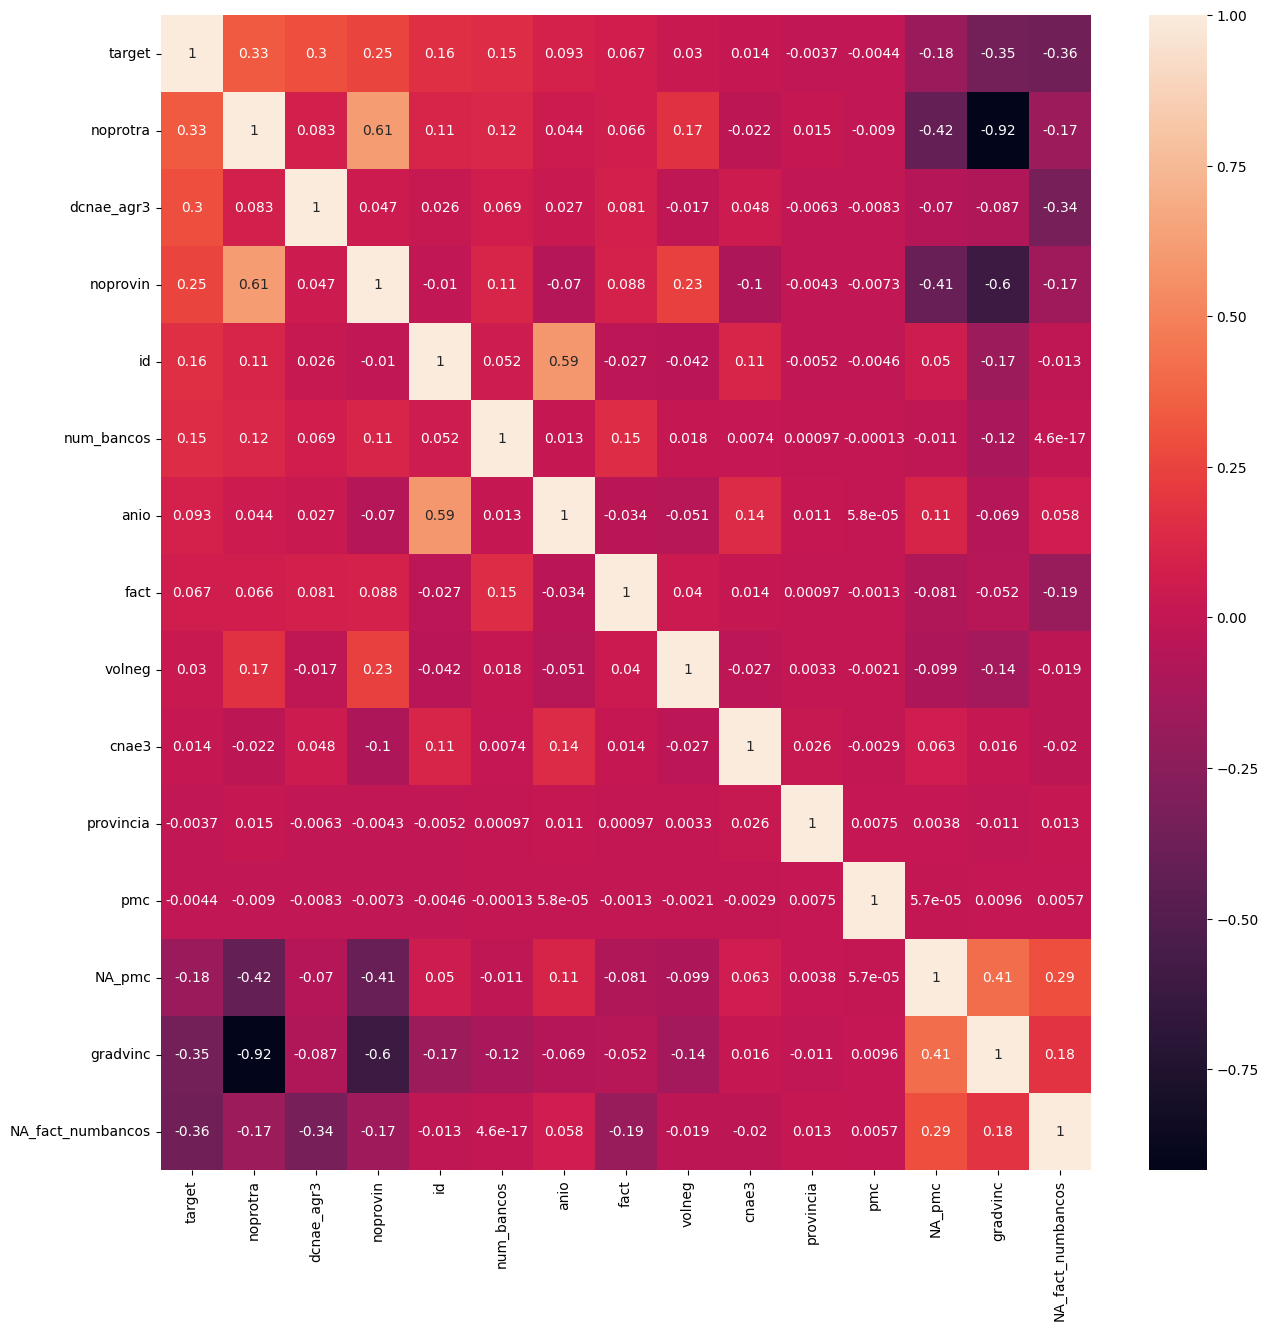

In [63]:
col = data.corr().nlargest(20, "target").target.index
plt.figure(figsize=(15, 15))
sns.heatmap(data[col].corr(), annot=True, annot_kws={"size":10})

we can see that gradvinc, noprovin, volneg and noprotra are highly correlated

In [64]:
data[['gradvinc', 'noprovin', 'volneg', 'noprotra']].corr()

,gradvinc,noprovin,volneg,noprotra
gradvinc,1.000000,-0.603016,-0.137326,-0.917507
noprovin,-0.603016,1.000000,0.232573,0.610936
volneg,-0.137326,0.232573,1.000000,0.174833
noprotra,-0.917507,0.610936,0.174833,1.000000


In [65]:
data[['noprovin', 'volneg', 'noprotra']].corr()

,noprovin,volneg,noprotra
noprovin,1.000000,0.232573,0.610936
volneg,0.232573,1.000000,0.174833
noprotra,0.610936,0.174833,1.000000


we can drop gradvinc to get rid of very high correlation 

#### lets now check the relationship between the target variable and the other variables

##### noprotra:

Text(0.5, 1.0, 'contract pos per number of services with the bank')

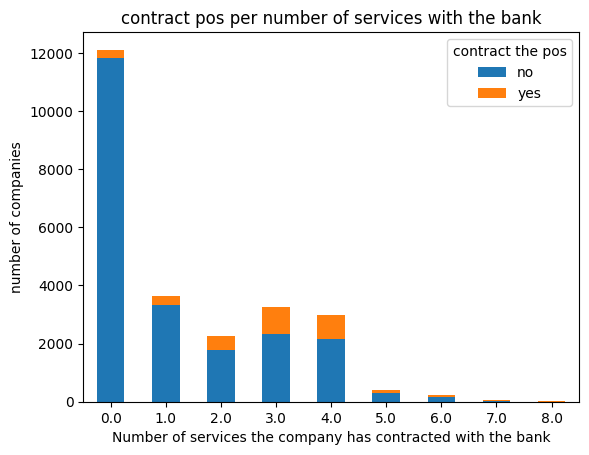

In [66]:
noprotra = pd.crosstab(data["noprotra"], data["target"])
noprotra.plot(kind = "bar", stacked = True, rot=0)

# Graph labels 
plt.xlabel("Number of services the company has contracted with the bank")
plt.ylabel("number of companies")
plt.legend(title="contract the pos", labels=["no", "yes"])
plt.title("contract pos per number of services with the bank")

In [67]:
noprotra ["perc"] = (noprotra[1] / (noprotra[0] + noprotra[1]))*100 
noprotra

target,0.0,1.0,perc
noprotra,,,
0.0,11811,297,2.452924
1.0,3321,301,8.310326
2.0,1787,457,20.365419
3.0,2318,940,28.852056
4.0,2146,847,28.299365
5.0,301,99,24.750000
6.0,149,70,31.963470
7.0,37,19,33.928571
8.0,2,8,80.000000


the higher the number of services with the bank the more likely the company contracts a pos in the next 3 months

##### num_bancos:

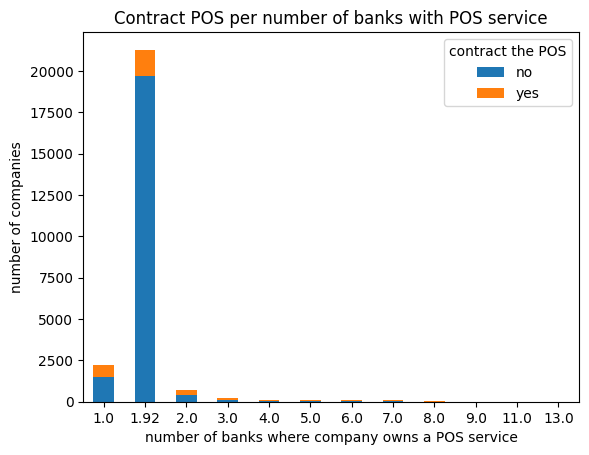

In [68]:
numbancos = pd.crosstab(data["num_bancos"], data["target"])
numbancos.plot(kind="bar", stacked=True, rot=0)

# Round the x-axis tick labels to 0.01
rounded_values = [round(value, 2) for value in numbancos.index]
plt.xticks(range(len(rounded_values)), rounded_values)

# Graph labels
plt.xlabel("number of banks where company owns a POS service")
plt.ylabel("number of companies")
plt.legend(title="contract the POS", labels=["no", "yes"])
plt.title("Contract POS per number of banks with POS service")

# Show the plot
plt.show()

In [69]:
numbancos ["perc"] = (numbancos[1] / (numbancos[0] + numbancos[1]))*100 
numbancos

target,0.0,1.0,perc
num_bancos,,,
1.00000,1503,721,32.419065
1.91948,19734,1562,7.334711
2.00000,400,291,42.112880
3.00000,106,145,57.768924
4.00000,39,66,62.857143
5.00000,25,67,72.826087
6.00000,29,93,76.229508
7.00000,26,57,68.674699
8.00000,8,27,77.142857


the higher the number of banks with the company's pos the more likely the company contracts a pos in the next 3 months

In [70]:
data.head()

,id,cnae3,dcnae_agr3,provincia,anio,gradvinc,noprotra,noprovin,volneg,fact,num_bancos,pmc,target,NA_fact_numbancos,NA_pmc
0,616016.0,432.0,0.066142,28.0,2016,1.0,4.0,4.0,86062.25,6789.14,1.91948,5442.152607,1.0,1,1
1,243724.0,411.0,0.008322,28.0,1992,5.0,0.0,0.0,0.00,6789.14,1.91948,5627.821297,0.0,1,1
2,637325.0,960.0,0.123340,33.0,2018,5.0,0.0,0.0,0.00,6789.14,1.91948,5461.491038,0.0,1,1
3,385667.0,432.0,0.066142,35.0,2004,1.0,4.0,4.0,174966.92,6789.14,1.91948,5510.215238,0.0,1,1
4,605174.0,466.0,0.139286,50.0,2013,5.0,0.0,0.0,0.00,6789.14,1.91948,75.730000,0.0,1,0


##### gradvinc:

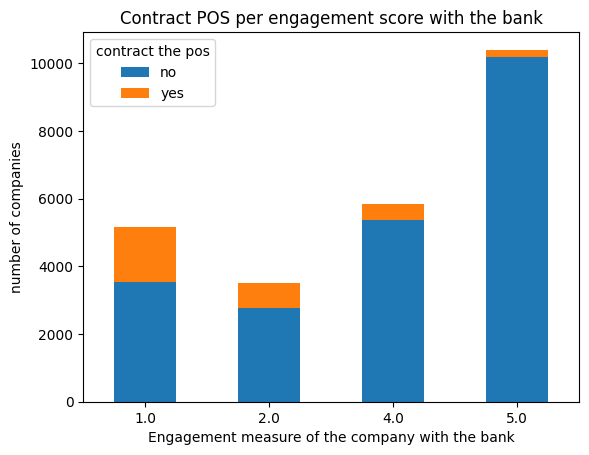

In [71]:
gradvinc = pd.crosstab(data["gradvinc"], data["target"])
gradvinc.plot(kind="bar", stacked=True, rot=0)

# Graph labels
plt.xlabel("Engagement measure of the company with the bank")
plt.ylabel("number of companies")
plt.legend(title="contract the pos", labels=["no", "yes"])
plt.title("Contract POS per engagement score with the bank")

# Show the plot
plt.show()

In [72]:
gradvinc ["perc"] = (gradvinc[1] / (gradvinc[0] + gradvinc[1]))*100 
gradvinc

target,0.0,1.0,perc
gradvinc,,,
1.0,3544,1604,31.157731
2.0,2763,757,21.505682
4.0,5373,473,8.091002
5.0,10192,204,1.962293


since the smaller the score is, the more engaged the company is with the bank we can conclude from the above that the more the company is engaged the higher the chances of the company contracting the pos in the following 3 months

## Feature engineering:

I will create a column to bin anio using an equal number of years creating 5 bins:

In [73]:
data

,id,cnae3,dcnae_agr3,provincia,anio,gradvinc,noprotra,noprovin,volneg,fact,num_bancos,pmc,target,NA_fact_numbancos,NA_pmc
0,616016.0,432.0,0.066142,28.0,2016,1.0,4.0,4.0,86062.25,6789.14,1.91948,5442.152607,1.0,1,1
1,243724.0,411.0,0.008322,28.0,1992,5.0,0.0,0.0,0.00,6789.14,1.91948,5627.821297,0.0,1,1
2,637325.0,960.0,0.123340,33.0,2018,5.0,0.0,0.0,0.00,6789.14,1.91948,5461.491038,0.0,1,1
3,385667.0,432.0,0.066142,35.0,2004,1.0,4.0,4.0,174966.92,6789.14,1.91948,5510.215238,0.0,1,1
4,605174.0,466.0,0.139286,50.0,2013,5.0,0.0,0.0,0.00,6789.14,1.91948,75.730000,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24916,742492.0,411.0,0.008322,4.0,2013,4.0,1.0,2.0,97529.72,6789.14,1.91948,5384.929016,0.0,1,1
24917,617487.0,931.0,0.246377,37.0,2017,1.0,3.0,4.0,656367.19,36679.43,7.00000,7.920000,0.0,0,0
24918,486289.0,475.0,0.201987,1.0,1991,5.0,0.0,0.0,0.00,6789.14,1.91948,70.260000,0.0,1,0
24919,405081.0,561.0,0.312336,30.0,2008,4.0,1.0,0.0,0.00,18783.81,1.00000,5559.420615,0.0,0,1


In [74]:
#bining anio
data['anio'].describe()

count    24910.00000
mean      2002.46668
std         11.44638
min       1896.00000
25%       1996.00000
50%       2003.00000
75%       2011.00000
max       2024.00000
Name: anio, dtype: float64

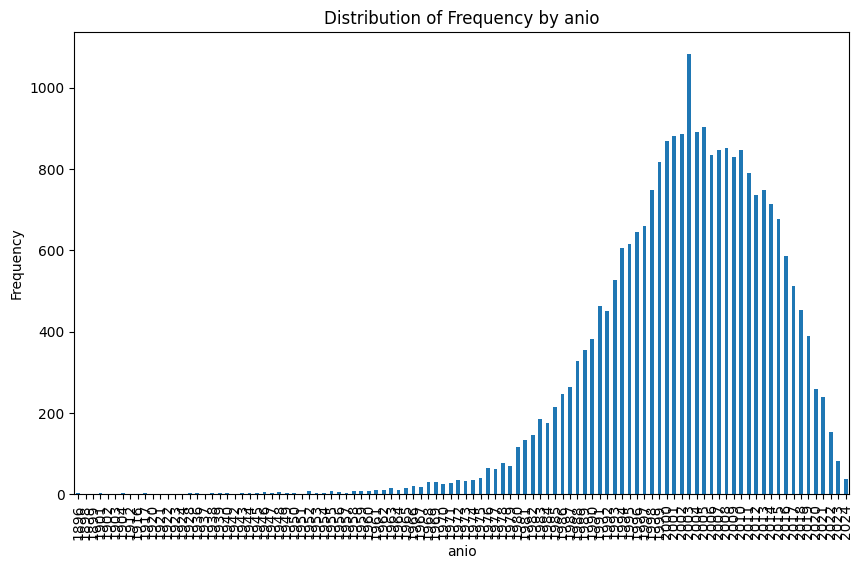

In [75]:
# Count the frequency of each unique value in the 'anio' column
anio_counts = data['anio'].value_counts()

# Sort the counts in descending order
anio_counts = anio_counts.sort_index()

# Plot the distribution as a histogram
plt.figure(figsize=(10, 6))
anio_counts.plot(kind='bar')
plt.xlabel('anio')
plt.ylabel('Frequency')
plt.title('Distribution of Frequency by anio')
plt.show()

In [76]:
# Specify the desired number of bins
num_bins = 5

# Calculate the bin size
bin_size = np.ceil(len(data) / num_bins)

# Assign bin labels based on the equal number of years
data['anio_bins'] = pd.qcut(data['anio'], q=num_bins, labels=False)

In [77]:
data['anio_bins'].value_counts()

0    5330
1    5233
3    4899
4    4851
2    4597
Name: anio_bins, dtype: int64

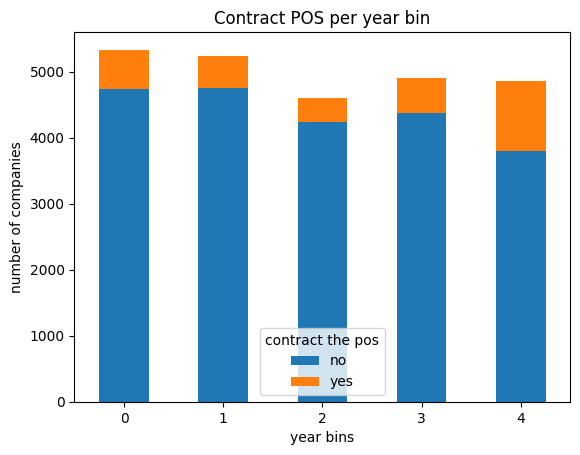

In [78]:
anio_bins = pd.crosstab(data["anio_bins"], data["target"])
anio_bins.plot(kind="bar", stacked=True, rot=0)

# Graph labels
plt.xlabel("year bins")
plt.ylabel("number of companies")
plt.legend(title="contract the pos", labels=["no", "yes"])
plt.title("Contract POS per year bin")

# Show the plot
plt.show()

It looks like our new variable doesnt really affect the target variable

# Models:

I'm going to start by creating a function to evaluate each model using the following metrics: Accuracy, Precision, Recall and F1 score

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred):

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print("Accuracy: {:.4f}".format(accuracy))
    print("Precision: {:.4f}".format(precision))
    print("Recall: {:.4f}".format(recall))
    print("F1 Score: {:.4f}".format(f1))

While getting the best score in all the metrics is important and so is a good balance between Precision and recall, I believe that in this specific case precision is more important than recall. Even though identifying a high number of customers with a high propensity to sign up is very important to us (captured by recall) but our salesforce has limited capacity and Precision measures the accuracy of identifying customers with the highest propensity to sign up. A high precision means that the customers identified as having a high propensity are more likely to actually convert and sign up for a POS. It helps ensure that our salesforce's limited capacity is utilized efficiently by targeting customers who are more likely to respond positively to the campaign. High precision reduces the chances of wasting resources on customers who are unlikely to convert.

#### Split X and y:

In [80]:
# Create X by excluding the "id" and "target" columns
X = data.drop(["id", "target"], axis=1)

# Create y as the "target" column
y = data["target"]

## Random forest:

In [81]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your feature matrix X and target variable y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
evaluate_model(y_test, y_pred)

Accuracy: 0.8978
Precision: 0.6224
Recall: 0.3964
F1 Score: 0.4843


### With hyperparameter tuning:

In [82]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Example values for n_estimators
    'max_depth': [None, 5, 10],  # Example values for max_depth
    'min_samples_split': [2, 5, 10],  # Example values for min_samples_split
    # Add more hyperparameters to tune if needed
}

# Create the GridSearchCV object with the classifier and parameter grid
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)

# Perform the hyperparameter tuning on the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_rf_classifier = grid_search.best_estimator_

# Make predictions on the test data using the best estimator
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model
evaluate_model(y_test, y_pred)

Accuracy: 0.8974
Precision: 0.6198
Recall: 0.3947
F1 Score: 0.4823


#### Since the data is unbalanced I will try to run a random forest with oversampling/undersampling:

## Random forest with oversampling:

In [83]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# Assuming you have your feature matrix X and target variable y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform oversampling using SMOTE
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the oversampled training data
rf_classifier.fit(X_train_oversampled, y_train_oversampled)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
evaluate_model(y_test, y_pred)

Accuracy: 0.8832
Precision: 0.5180
Recall: 0.5008
F1 Score: 0.5093


## Random forest with undersampling:

In [84]:
from imblearn.under_sampling import RandomUnderSampler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform undersampling using RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the undersampled training data
rf_classifier.fit(X_train_undersampled, y_train_undersampled)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
evaluate_model(y_test, y_pred)

Accuracy: 0.8061
Precision: 0.3672
Recall: 0.8325
F1 Score: 0.5096


## XGBoost and hyperparametertuning:

In [85]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [86]:

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Assuming you have your feature matrix X and target variable y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Example values for n_estimators
    'max_depth': [3, 5, 7],  # Example values for max_depth
    'learning_rate': [0.1, 0.01, 0.001],  # Example values for learning_rate
    # Add more hyperparameters to tune if needed
}

# Create the RandomizedSearchCV object with the classifier and parameter grid
randomized_search = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_grid, cv=5)

# Perform the hyperparameter tuning on the training data
randomized_search.fit(X_train, y_train)

# Get the best estimator from the randomized search
best_xgb_classifier = randomized_search.best_estimator_

# Make predictions on the test data using the best estimator
y_pred = best_xgb_classifier.predict(X_test)

# Evaluate the model
evaluate_model(y_test, y_pred)

Accuracy: 0.8996
Precision: 0.6291
Recall: 0.4163
F1 Score: 0.5010


#### Let's check the most important features for this model:

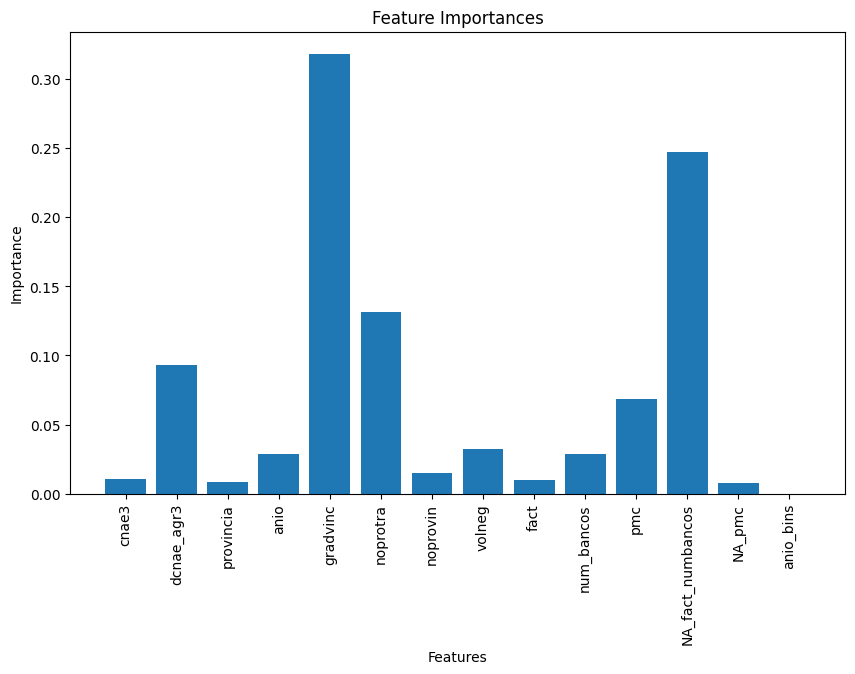

In [164]:
# Obtain feature importances
importances = best_xgb_classifier.feature_importances_
features = X_train.columns

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(features, importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()

XGBoost with hyperparamter tuning using RandomizedSearch gave me the best scores overall, this is the model I will use to predict the testing dataset

# Predictions

#### I will start by cleaning and preparing the testing dataset 

In [134]:
data_test=pd.read_csv("20230507_test_no_target.txt", sep=";")

In [135]:
data_test

,id,cnae3,dcnae_agr3,provincia,anio,gradvinc,noprotra,noprovin,volneg,fact,num_bancos,pmc
0,458072,474,COMERCIO AL POR MENOR DE EQUIPOS PARA LAS TECN...,8.0,2007.0,5,0,0,0.00,NaN,NaN,NaN
1,516331,412,CONSTRUCCION DE EDIFICIOS,28.0,1998.0,5,0,0,0.00,NaN,NaN,NaN
2,3424,681,COMPRAVENTA DE BIENES INMOBILIARIOS POR CUENTA...,8.0,1996.0,1,3,3,601225.40,NaN,NaN,NaN
3,880645,452,MANTENIMIENTO Y REPARACION DE VEHICULOS DE MOTOR,30.0,2015.0,5,0,0,0.00,NaN,NaN,NaN
4,31272,465,COMERCIO AL POR MAYOR DE EQUIPOS PARA LAS TECN...,28.0,1978.0,4,1,4,115845.06,10479.74,3.0,68.85
...,...,...,...,...,...,...,...,...,...,...,...,...
2847,458428,960,OTROS SERVICIOS PERSONALES,23.0,1994.0,5,0,0,0.00,NaN,NaN,NaN
2848,192154,683,ACTIVIDADES INMOBILIARIAS POR CUENTA DE TERCEROS,46.0,1998.0,4,1,1,410332.50,NaN,NaN,41.47
2849,213202,310,FABRICACION DE MUEBLES,46.0,2004.0,5,0,0,0.00,NaN,NaN,NaN
2850,776938,411,PROMOCION INMOBILIARIA,17.0,2001.0,5,0,0,90.77,NaN,NaN,NaN


In [136]:
data_test.isnull().sum()

id               0
cnae3            0
dcnae_agr3       0
provincia       27
anio            13
gradvinc         0
noprotra         0
noprovin         0
volneg           0
fact          2446
num_bancos    2446
pmc           1815
dtype: int64

I will start by imputing the missing values in the anio column by the most frequent value from the training data, which is 2003:

In [137]:
data_test['anio'] = data_test['anio'].fillna(2003)

Again, I will impute the missing values in the column provincia with the most frequent value in the training dataset, which is 28: 

In [138]:
data_test['provincia'] = data_test['provincia'].fillna(28)

I will encode the column dcnae_agr3 using target encoding:

In [139]:
data_test['dcnae_agr3'] = data_test['dcnae_agr3'].map(target_mean_encoding)
data

,id,cnae3,dcnae_agr3,provincia,anio,gradvinc,noprotra,noprovin,volneg,fact,num_bancos,pmc,target,NA_fact_numbancos,NA_pmc,anio_bins
0,616016.0,432.0,0.066142,28.0,2016.0,1.0,4.0,4.0,86062.25,6789.14,1.91948,5442.152607,1.0,1,1,4
1,243724.0,411.0,0.008322,28.0,1992.0,5.0,0.0,0.0,0.00,6789.14,1.91948,5627.821297,0.0,1,1,0
2,637325.0,960.0,0.123340,33.0,2018.0,5.0,0.0,0.0,0.00,6789.14,1.91948,5461.491038,0.0,1,1,4
3,385667.0,432.0,0.066142,35.0,2004.0,1.0,4.0,4.0,174966.92,6789.14,1.91948,5510.215238,0.0,1,1,2
4,605174.0,466.0,0.139286,50.0,2013.0,5.0,0.0,0.0,0.00,6789.14,1.91948,75.730000,0.0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24916,742492.0,411.0,0.008322,4.0,2013.0,4.0,1.0,2.0,97529.72,6789.14,1.91948,5384.929016,0.0,1,1,4
24917,617487.0,931.0,0.246377,37.0,2017.0,1.0,3.0,4.0,656367.19,36679.43,7.00000,7.920000,0.0,0,0,4
24918,486289.0,475.0,0.201987,1.0,1991.0,5.0,0.0,0.0,0.00,6789.14,1.91948,70.260000,0.0,1,0,0
24919,405081.0,561.0,0.312336,30.0,2008.0,4.0,1.0,0.0,0.00,18783.81,1.00000,5559.420615,0.0,0,1,3


Next, I will create a column that checks for missing values in the columns fact and and num_bancos (just one for both since they have the same missing values):

In [140]:
data_test.loc[data_test['fact'].isnull(), 'NA_fact_numbancos'] = 1

I will impute the missing values in the column fact with the median of the testing dataset (saved as the variable median_value):

In [141]:
data_test['fact'].fillna(median_value, inplace=True)

I will impute the missing values in the column num_bancos with the mean of the testing dataset (also saved as the variable mean_value):

In [142]:
data_test['num_bancos'].fillna(mean_value, inplace=True)

For the column pmc, I will start by creating a column to check for missing values:

In [143]:
data_test.loc[data_test['pmc'].isnull(), 'NA_pmc'] = 1

In [144]:
data_test['NA_fact_numbancos'] = data_test['NA_fact_numbancos'].fillna(1)

In [145]:
imputed_values_test = imputer.transform(data_test[numeric_features])

In [146]:
data_test[numeric_features] = imputed_values_test

In [147]:
data_test.isnull().sum()

id                      0
cnae3                   0
dcnae_agr3              0
provincia               0
anio                    0
gradvinc                0
noprotra                0
noprovin                0
volneg                  0
fact                    0
num_bancos              0
pmc                     0
NA_fact_numbancos       0
NA_pmc               1037
dtype: int64

In [148]:
data_test['NA_fact_numbancos'] = data_test['NA_fact_numbancos'].fillna(0)

In [149]:
data_test['NA_pmc'] = data_test['NA_pmc'].fillna(0)

In [150]:
data_test.isnull().sum()

id                   0
cnae3                0
dcnae_agr3           0
provincia            0
anio                 0
gradvinc             0
noprotra             0
noprovin             0
volneg               0
fact                 0
num_bancos           0
pmc                  0
NA_fact_numbancos    0
NA_pmc               0
dtype: int64

I will create a new column, anio_bins like I did for the training dataset:

In [151]:
# Specify the desired number of bins
num_bins = 5

# Calculate the bin size
bin_size = np.ceil(len(data_test) / num_bins)

# Assign bin labels based on the equal number of years
data_test['anio_bins'] = pd.qcut(data_test['anio'], q=num_bins, labels=False)

### I can now start predicting:

First I will define X excluding the column id:

In [152]:
test_X = data_test.drop(["id"], axis=1)

In [153]:
test_y = best_xgb_classifier.predict(test_X)

In [157]:
test_y

array([0, 0, 0, ..., 0, 0, 0])

In [158]:
data_test['predicted_target'] = test_y

In [159]:
data_test

,id,cnae3,dcnae_agr3,provincia,anio,gradvinc,noprotra,noprovin,volneg,fact,num_bancos,pmc,NA_fact_numbancos,NA_pmc,anio_bins,predicted_target
0,458072.0,474.0,0.151261,8.0,2007.0,5.0,0.0,0.0,0.00,6789.14,1.91948,5538.666704,1.0,1.0,3,0
1,516331.0,412.0,0.021298,28.0,1998.0,5.0,0.0,0.0,0.00,6789.14,1.91948,5512.109056,1.0,1.0,1,0
2,3424.0,681.0,0.013333,8.0,1996.0,1.0,3.0,3.0,601225.40,6789.14,1.91948,5537.276741,1.0,1.0,1,0
3,880645.0,452.0,0.366265,30.0,2015.0,5.0,0.0,0.0,0.00,6789.14,1.91948,5346.034638,1.0,1.0,4,0
4,31272.0,465.0,0.163265,28.0,1978.0,4.0,1.0,4.0,115845.06,10479.74,3.00000,68.850000,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2847,458428.0,960.0,0.123340,23.0,1994.0,5.0,0.0,0.0,0.00,6789.14,1.91948,5538.504293,1.0,1.0,0,0
2848,192154.0,683.0,0.038278,46.0,1998.0,4.0,1.0,1.0,410332.50,6789.14,1.91948,41.470000,1.0,0.0,1,0
2849,213202.0,310.0,0.078740,46.0,2004.0,5.0,0.0,0.0,0.00,6789.14,1.91948,5650.291995,1.0,1.0,2,0
2850,776938.0,411.0,0.008322,17.0,2001.0,5.0,0.0,0.0,90.77,6789.14,1.91948,5393.278517,1.0,1.0,1,0


In [160]:
data_test['predicted_target'].value_counts()

0    2737
1     115
Name: predicted_target, dtype: int64

I will now drop all the columns except for id and predicted_target and export the dataframe into a text file:

In [162]:
# Drop columns except 'id' and 'predicted_target'
data_test_filtered = data_test[['id', 'predicted_target']]

# Specify the desired file path
file_path = 'C:/Users/yara-/OneDrive/Desktop/AI in banking/individual asst/data_test_filtered.txt'

# Export the DataFrame as a text file separated by semicolons
data_test_filtered.to_csv(file_path, sep=';', index=False)